In [1]:
%env DISPLAY=211.139.119.100:0
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from IPython.display import Image
import time,random,base64
import MAS

env: DISPLAY=211.139.119.100:0


In [2]:
chrome_options = webdriver.chrome.options.Options()
chrome_options.add_argument("--headless")
browser = webdriver.Chrome(options=chrome_options)

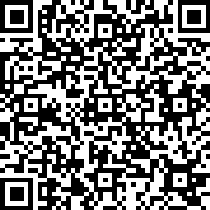

In [3]:
browser.get('https://www.xuexi.cn')
time.sleep(10)
if browser.page_source.find('login-icon') > 0:
    #学习平台登陆
    browser.get('https://pc.xuexi.cn/points/login.html?ref=https%3A%2F%2Fwww.xuexi.cn%2F')
    #browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(10)
    frame_image = browser.find_element_by_xpath('//*[@id="ddlogin-iframe"]')
    browser.switch_to.frame(frame_image)
    #ele_image=browser.find_element_by_xpath('//*[@id="qrcode"]/img')
    ele_image=browser.find_element_by_xpath('//*[@id="app"]/div/div[1]/div/div[1]/div[1]/img')
    display(Image(data=base64.b64decode(ele_image.get_attribute('src')[22:])))

In [4]:
cellphone = input('Scan It and Press Enter Cellphone: ')

Scan It and Press Enter Cellphone: 13806296955


In [5]:
#ele_article=browser.find_elements_by_class_name('_3wnLIRcEni99IWb4rSpguK')
#cnt_art=0
#cnt_video=0

In [6]:
#普通文章学习
ele_article=browser.find_element_by_xpath('//*[@id="root"]/div/header/div[2]/div[1]/div[1]/a[1]')
ele_article.click()
time.sleep(10)
browser.switch_to.window(browser.window_handles[1])

In [ ]:
for i in range(6):
    t_article = random.choice(browser.find_elements_by_class_name('text-wrap'))
    print(i, t_article.text)
    t_article.click()
    #ran_int = random.randint(0,len(browser.find_elements_by_class_name('text-wrap')))
    #print(i, browser.find_elements_by_class_name('text-wrap')[ran_int].text)
    #browser.find_elements_by_class_name('text-wrap')[ran_int].click()
    current_windows = browser.window_handles
    browser.switch_to.window(current_windows[2])
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(200)
    browser.close()
    browser.switch_to.window(browser.window_handles[1])

0 习近平：团结合作是国际社会战胜疫情最有力武器
1 习近平致全国青联十三届全委会和全国学联二十七大的贺信


In [ ]:
#返回主页
browser.close()
browser.switch_to.window(browser.window_handles[0])

In [ ]:
#视频文章学习
ele_v_article=browser.find_element_by_xpath('//*[@id="root"]/div/header/div[2]/div[1]/div[2]/a[2]')
ele_v_article.click()
time.sleep(10)
browser.switch_to.window(browser.window_handles[1])

In [ ]:
#随机进入视频栏目
ele_v_article = random.choice(browser.find_elements_by_xpath('//*[@id="495f"]/div/div/div/div/div/section/div/div/div/div[1]/*'))
print(ele_v_article)
#ele_v_article=browser.find_elements_by_xpath('//*[@id="495f"]/div/div/div/div/div/section/div/div/div/div[1]/*')[ran_int]
#ele_v_article=browser.find_element_by_xpath('//*[@id="495f"]/div/div/div/div/div/section/div/div/div/div[1]/div[1]/div/div/span')
ele_v_article.click()
time.sleep(10)
browser.switch_to.window(browser.window_handles[2])

In [ ]:
#随机进入视频子栏目
video_len = len(browser.find_elements_by_xpath('//body/div/div/div/section/div/div/div/div/div/section[2]/div/div/div/div/div/section/div/div/div/div/div/div/div/div[2]/div/section/div/div/div/div/div/section/div/div/div/div/div/section/div/div/div/div/div/div/div/div[1]/div/*'))
print(video_len)
ran_int = random.randint(1,video_len-1)
print(ran_int)
ele_v_article=browser.find_elements_by_xpath('//body/div/div/div/section/div/div/div/div/div/section[2]/div/div/div/div/div/section/div/div/div/div/div/div/div/div[2]/div/section/div/div/div/div/div/section/div/div/div/div/div/section/div/div/div/div/div/div/div/div[1]/div/*')[ran_int]
#ele_v_article=browser.find_element_by_xpath('//*[@id="495f"]/div/div/div/div/div/section/div/div/div/div[1]/div[1]/div/div/span')
ele_v_article.click()
time.sleep(10)


In [ ]:
for i in range(6):
    #ran_int = random.randint(0,len(browser.find_elements_by_class_name('textWrapper')))
    #print(i, ran_int, browser.find_elements_by_class_name('textWrapper')[ran_int].text)
    #browser.find_elements_by_class_name('textWrapper')[ran_int].click()
    v_article = random.choice(browser.find_elements_by_class_name('textWrapper'))
    print(i, v_article.text)
    v_article.click()
    current_windows = browser.window_handles
    browser.switch_to.window(current_windows[3])
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(300)
    browser.close()
    browser.switch_to.window(browser.window_handles[2])

In [ ]:
#关闭其他窗口，进入主页
for i in range(1,len(browser.window_handles)):
    browser.switch_to.window(browser.window_handles[1])
    browser.close()
browser.switch_to.window(browser.window_handles[0])

In [ ]:
#检查积分情况
ele_v_article=browser.find_element_by_xpath('//*[@id="root"]/div/div/section/div/div/div/div/div[4]/section/div[4]')
ele_v_article.click()
browser.switch_to.window(browser.window_handles[1])
time.sleep(10)
ele_score=browser.find_elements_by_class_name('my-points-points')
print("Today's Score is {}".format(ele_score[1].text))
#发送短信提醒
MAS.mas_send_sms(cellphone,"Today's Score is {}".format(ele_score[1].text),'Instant')

In [ ]:
#退出
browser.quit()

In [ ]:
MAS.mas_send_sms(cellphone,"Today's Score is {}".format(ele_score[1].text),'Instant')

In [ ]:
#关闭当前窗口并转主页
browser.close()
browser.switch_to.window(browser.window_handles[0])

In [ ]:
print(browser.current_url)
print(browser.page_source)

In [ ]:
ele_score=browser.find_elements_by_class_name('my-points-points')
len(ele_score)

In [ ]:
browser.get('https://pc.xuexi.cn/points/login.html?ref=https%3A%2F%2Fwww.xuexi.cn%2F')
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
frame_image = browser.find_element_by_xpath('//*[@id="ddlogin-iframe"]')
browser.switch_to.frame(frame_image)
ele_image=browser.find_element_by_xpath('//*[@id="qrcode"]/img')
display(Image(data=base64.b64decode(ele_image.get_attribute('src')[22:])))

In [ ]:
frame_image = browser.find_element_by_xpath('//*[@id="ddlogin-iframe"]')

In [ ]:
a = BeautifulSoup(browser.page_source)

In [ ]:
print(a.prettify())
b = a.find_all(id='4e94')[0]

In [ ]:
print(a.body.div.div.section.div.div.div.div.div.prettify())

In [ ]:
print(a.)

In [ ]:
ele = browser.find_elements_by_xpath('//*[@id="4e94"]/div/div/div/div/div/div/div/div[1]/div/*')[0]

In [ ]:
ele.parent.tag_name

In [ ]:
type(ele)

In [ ]:
ele = browser.find_element_by_xpath('//*[@id="4e94"]')

In [ ]:
ele.text

In [ ]:
import lxml
req_xml = lxml.etree.HTML(browser.page_source)

In [ ]:
type(req_xml)

In [ ]:
test = req_xml.xpath('//*[@id="665a"]')

In [ ]:
elem = test[0]

In [ ]:
elem.getroottree().getelementpath(elem)

In [ ]:
l.getelementpath(elem)

In [ ]:
browser.get('https://www.xuexi.cn')

In [ ]:
ran_int = random.randint(0,len(browser.find_elements_by_xpath('//*[@id="495f"]/div/div/div/div/div/section/div/div/div/div[1]/*')))
print(ran_int)
ele_v_article=browser.find_elements_by_xpath('//*[@id="495f"]/div/div/div/div/div/section/div/div/div/div[1]/*')[ran_int]

## browser.get('https://www.xuexi.cn')